<h1>How (and why) To Run R In Jupyter Notebook</h1>

<span style="font-size:8pt;">This mini-tutorial is really a compilation of various others, thanks to Davo for the <a href="https://davetang.org/muse/2018/12/31/visualising-google-trends-results-with-r/">Google trends R code</a> and Rich Pauloo for the <a href="https://richpauloo.github.io/2018-05-16-Installing-the-R-kernel-in-Jupyter-Lab/">Jupyter R installation instructions</a></span>

<p>The main purpose of Jupyter Notebook is that it supports (at time of writing) 100+ languages (AKA kernels) within a single accessible web-based IDE (integrated development environment). Unlike traditional IDEs, jupyter provides cells (such as this one) to separate concerns, and can be run sequentially or separately as required. Additionally, GitHub can even parse these files to show them neatly (though the code parts won't work there!)</p>

<p>Additionally, Jupyter Notebook supports <i>markdown</i>, which means you can write this page right here in a near HTML format and produce aesthetically pleasing, human readable documents which can have integrated code. For example:

In [22]:
# Uncomment as needed.
#install.packages("maps")
#install.packages("repr")
 
# load packages
library(maps)
library(repr)

print("done")


[1] "done"


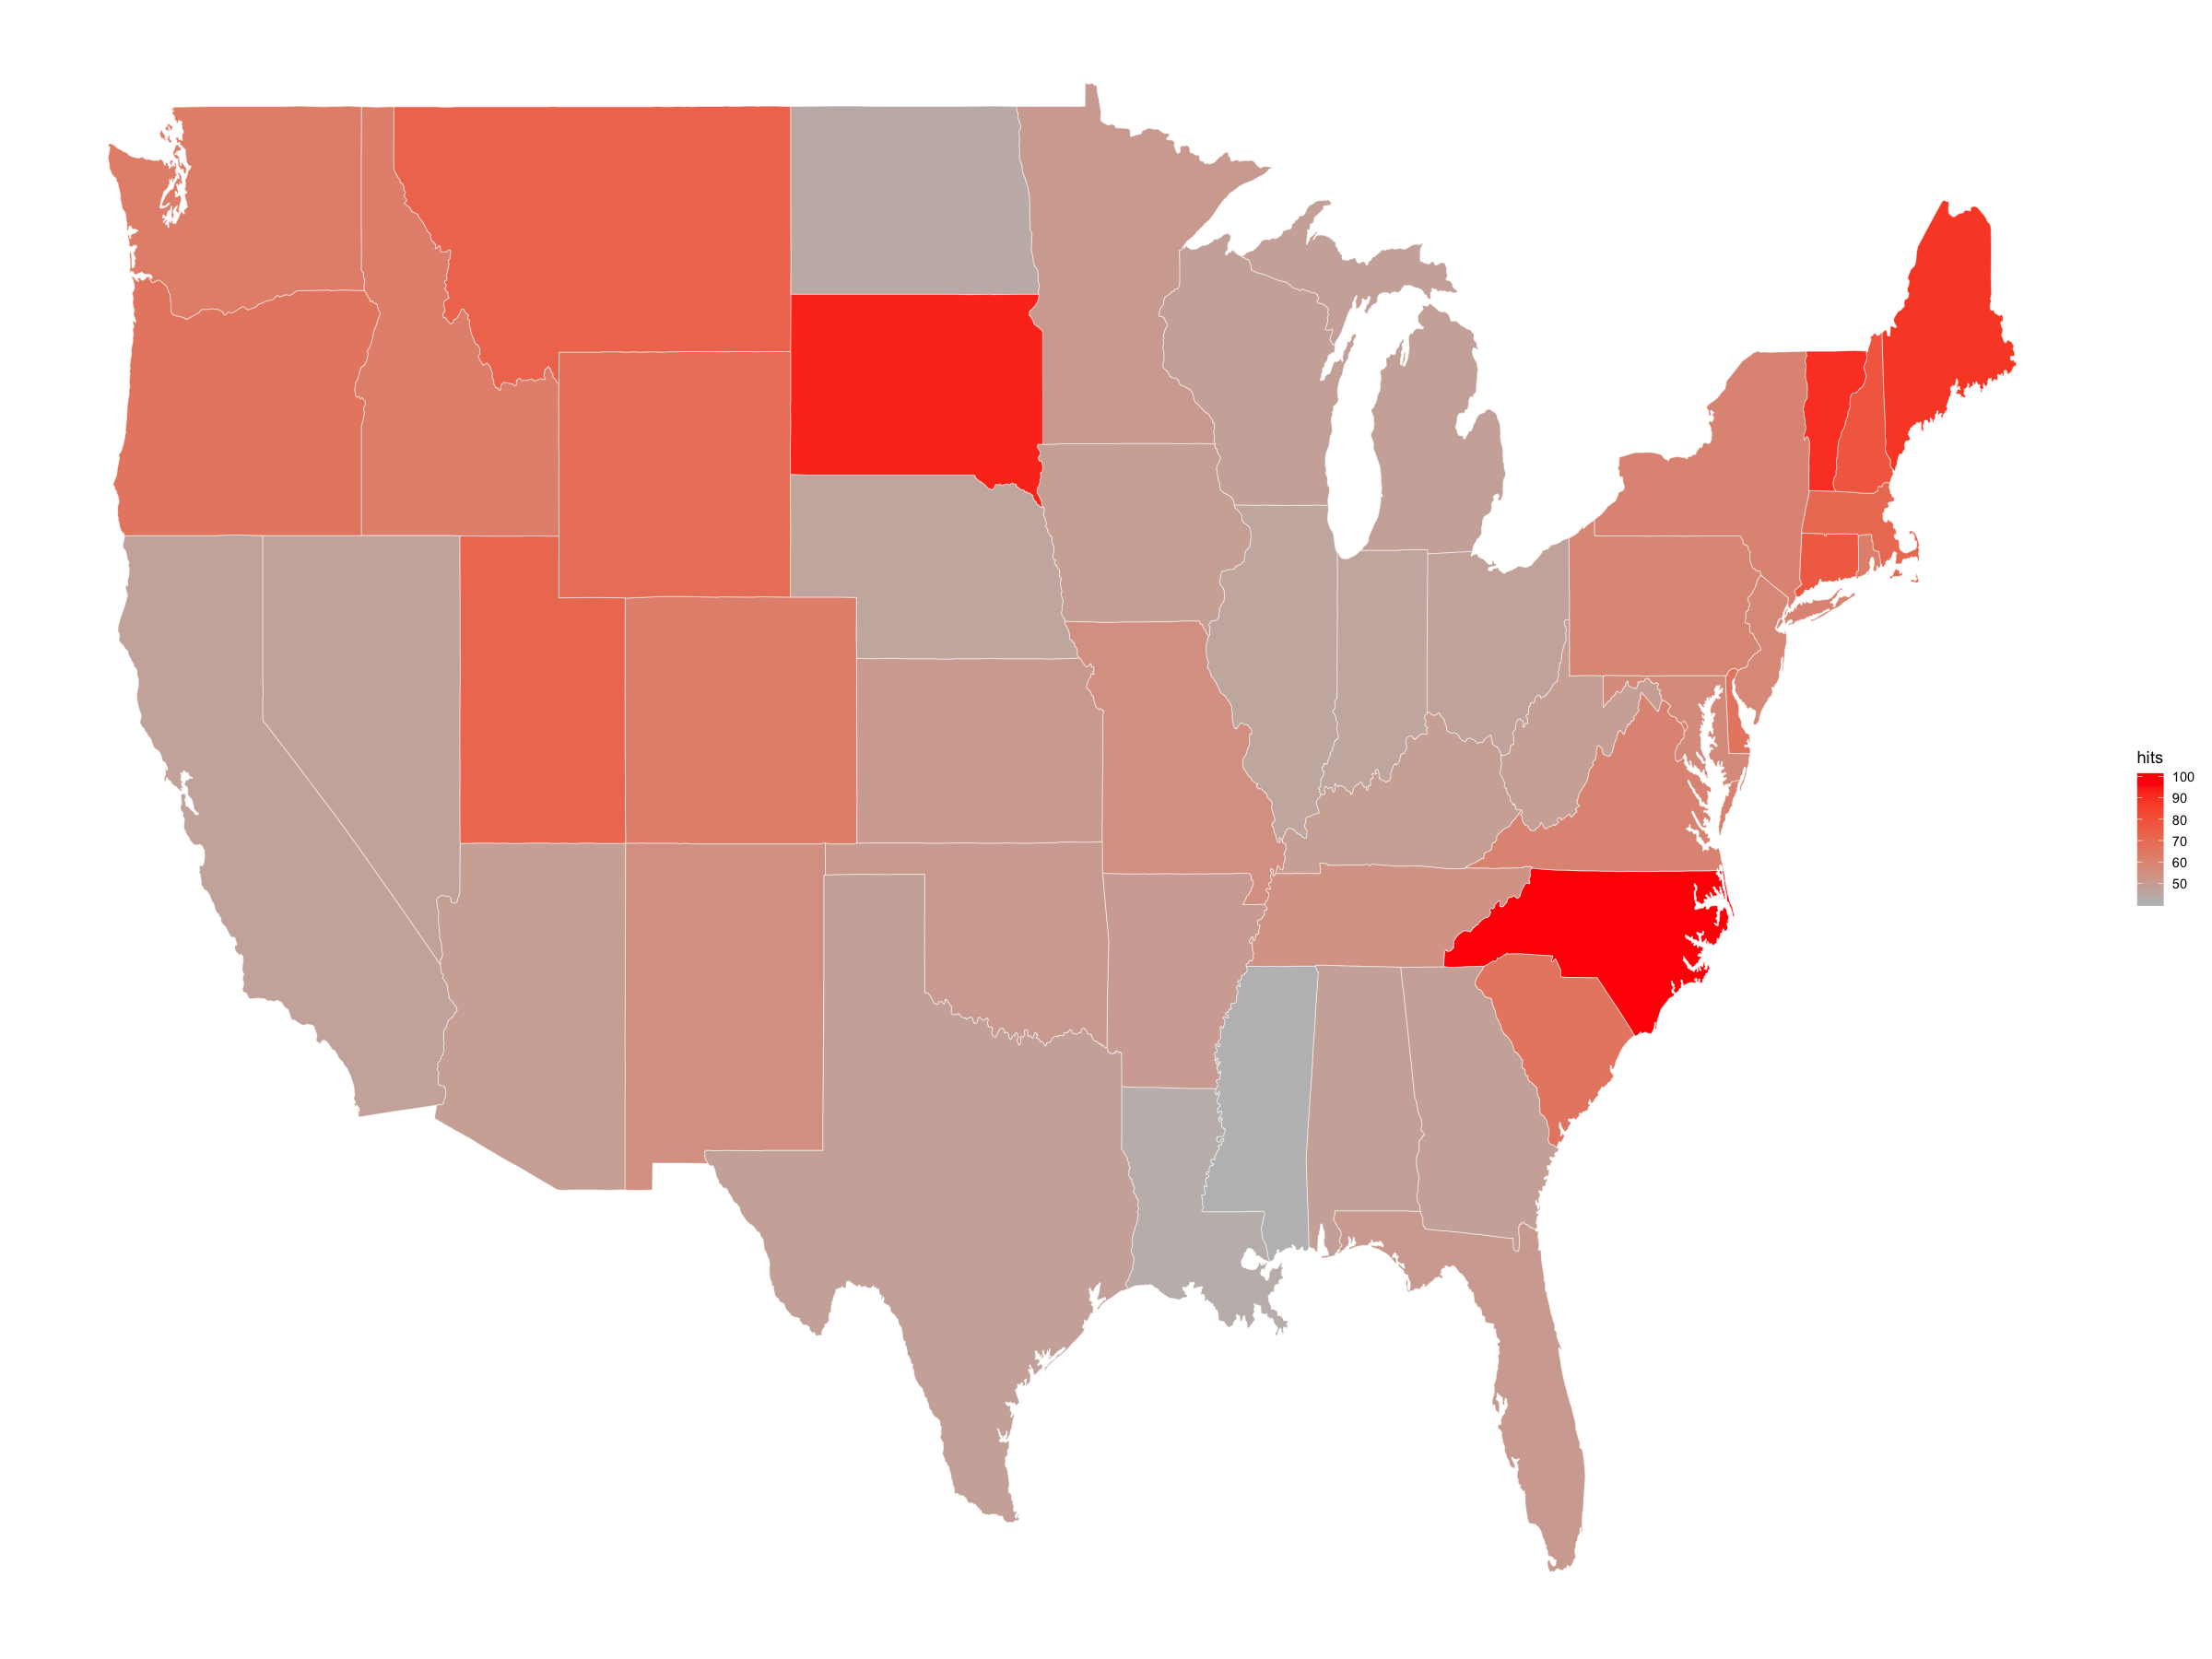

In [23]:
# Since R normally outputs plots to files, or the resizable window in Rstudio / XQuartz, you need to specify the sizes here for Jupyter:
options(repr.plot.width=20, repr.plot.height=15)


# Hides a warning implicit with the maps package.
options(warn=-1)

# Keyword to search for
keyword = "Scotland"
res <- gtrends(keyword,
               geo = "US",
               time = "all")
 
state <- map_data("state")
 
res$interest_by_region %>%
  mutate(region = tolower(location)) %>%
  filter(region %in% state$region) %>%
  select(region, hits) -> my_df
 
ggplot() +
  geom_map(data = state,
           map = state,
           aes(x = long, y = lat, map_id = region),
           fill="#ffffff", color="#ffffff", size=0.15) +
  geom_map(data = my_df,
           map = state,
           aes(fill = hits, map_id = region),
           color="#ffffff", size=0.15) +
  scale_fill_continuous(low = 'grey', high = 'red') +
  theme(panel.background = element_blank(),
        axis.ticks = element_blank(),
        axis.text = element_blank(),
        axis.title = element_blank())

<p>This is particularly useful as it means you can import and export your data into the local directory, then use the data or plots within a markdown environment.</p>

<h2>Prerequisites</h2>

<p>I recommend getting Jupyter Lab rather than plain old Notebook, which has some additional functionality such as creating multiple terminals, tabs, multiple notebooks, etc.</p>

<p>Installation depends on your system. Regardless of which you choose to use, you must first install Anaconda. Rather than recreate the wheel, <a href="https://docs.anaconda.com/anaconda/install/">click here to follow some simple installation instructions</a>.</p>


<h2>Install Jupyter lab</h2>
<p>Once you have Anaconda installed, you type the following into your terminal / cmd (for Jupyter Lab):</p>

    conda install -c conda-forge jupyterlab
    
<p>Once this has installed, you can launch it by typing the following:</p>

    jupyter lab
    
<p>You'll notice it doesn't yet contain R. Installing R is an additional step. You can also install Java, Haskell, Ruby, Javascript, Scala, Perl, php, MATLAB, PowerShell, Wolfram, SoS (which allows interaction between these various languages <i>within</i> jupyter) and dozens more, as you see fit.</p>



<h2>Connecting R to Jupyter Lab</h2>

<p>To allow R to be accessed from Jupyter (I'm assuming you already have R installed on your system), what you need to do depends on which OS you're using.</p>

<h3>Windows</h3>

First run R in administrative mode. Next, run this code:

    install.packages("devtools")
    devtools::install_github("IRkernel/IRkernel")
    IRkernel::installspec()

Done! You can now type `jupyter lab` into `cmd` and access R as a kernel option (you should see it on the launch screen - if not you can go to file -> new -> notebook, then select R).

<h3>OSX / Mac</h3>

Open R and run the following code:

    install.packages(c('repr', 'IRdisplay', 'evaluate', 'crayon', 'pbdZMQ', 'devtools', 'uuid', 'digest'))
    devtools::install_github('IRkernel/IRkernel')
    
Then this, also in R:

    IRkernel::installspec() # install for the current user
    IRkernel::installspec(user = FALSE) # install system-wide
    
Done! You can now type `jupyter lab` into `cmd` and access R as a kernel option (you should see it on the launch screen - if not you can go to file -> new -> notebook, then select R).